# Análise exploratória - Como ganhar uma partida de League of Legends:

Nesse notebook iremos fazer uma análise exploratória dos dados dos melhores jogadores de lol do mundo, e entender quais são os fatores que levam um jogador a vencer partidas.
Óbvio que estamos analisando partidas dos melhores do mundo, então tudo será baseado no que esses jogadores fazem. Essa análise descritiva também servirá para nossa interface que iremos fazer no streamlit mais tarde.

Já com nosso modelo em mãos, iremos incluir no dataframe uma coluna com a probabilidade de vitória de cada partida, e fazer nossa análise descritiva baseada nessa probabilidade

In [2]:
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel("content/MATCHS.xlsx")

with open('../model/model.pkl', 'rb') as file:
    model = pickle.load(file)

In [4]:
df['Probabilidade de Vitória'] = model.predict_proba(df)[:, 1]
df['Resultado Predito'] = model.predict(df)

In [5]:
df[['win', 'Probabilidade de Vitória', 'Resultado Predito']]

,win,Probabilidade de Vitória,Resultado Predito
0,False,0.002021,False
1,True,0.996069,True
2,True,0.998512,True
3,False,0.000507,False
4,True,0.999055,True
...,...,...,...
177963,True,0.965457,True
177964,False,0.000695,False
177965,True,0.998762,True
177966,False,0.004959,False


In [6]:
df.columns

Index(['baronKills', 'bountyLevel', 'champLevel', 'championName',
       'consumablesPurchased', 'damageDealtToObjectives',
       'damageSelfMitigated', 'deaths', 'dragonKills', 'firstBloodAssist',
       'firstTowerAssist', 'goldSpent', 'individualPosition',
       'inhibitorTakedowns', 'inhibitorsLost', 'item0', 'item1', 'item2',
       'item3', 'item4', 'item5', 'item6', 'longestTimeSpentLiving',
       'magicDamageDealtToChampions', 'objectivesStolenAssists',
       'physicalDamageDealtToChampions', 'spell1Casts', 'spell2Casts',
       'spell3Casts', 'spell4Casts', 'summoner1Casts', 'summoner1Id',
       'summoner2Casts', 'summoner2Id', 'teamId', 'timeCCingOthers',
       'timePlayed', 'totalDamageDealtToChampions', 'totalDamageTaken',
       'totalHeal', 'totalHealsOnTeammates', 'totalTimeSpentDead',
       'trueDamageDealtToChampions', 'turretTakedowns', 'turretsLost',
       'visionScore', 'win', 'allPings', 'participations', 'totalFarm',
       'Probabilidade de Vitória', 'Res

#### Analisando os campeões com maior taxa de vitória:

In [7]:
total_games = df['championName'].value_counts().sort_values(ascending=False)
wins = df[df['win'] == True]['championName'].value_counts()
win_rate = ((wins / total_games).fillna(0) * 100).sort_values(ascending=False)

In [8]:
top_10 = win_rate.head(10)
worst_10 = win_rate.tail(10)
plot_data = pd.concat([top_10, worst_10])

Text(0, 0.5, 'Número de Partidas Jogadas')

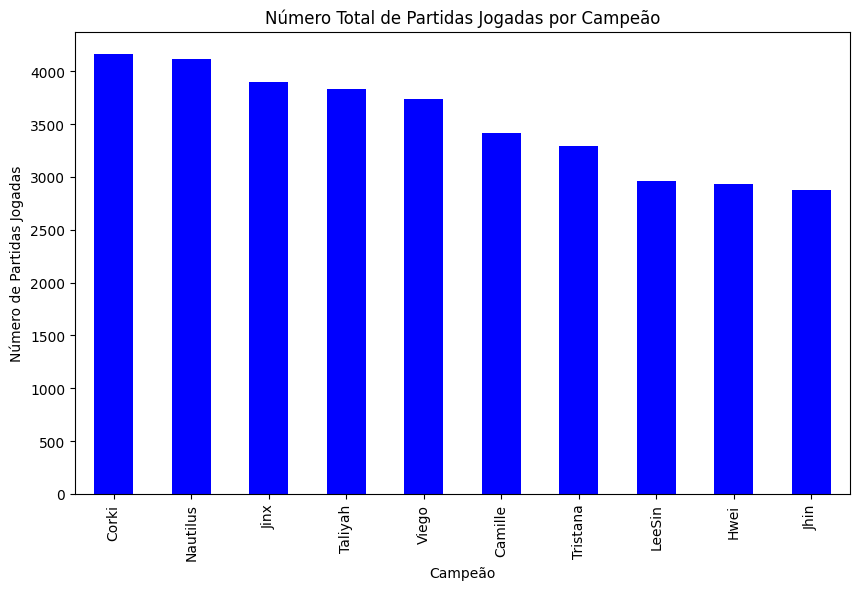

In [9]:
plt.figure(figsize=(10, 6))
total_games.head(10).plot(kind='bar', color='blue')
plt.title('Número Total de Partidas Jogadas por Campeão')
plt.xlabel('Campeão')
plt.ylabel('Número de Partidas Jogadas')

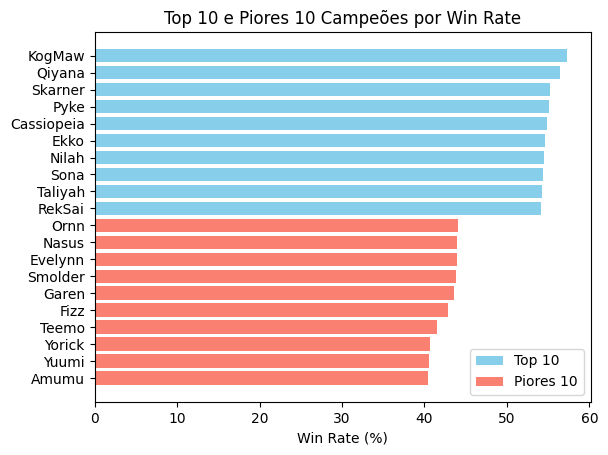

In [10]:
# Plotando os 10 melhores em azul
plt.barh(top_10.index, top_10.values, color='skyblue', label='Top 10')

# Plotando os 10 piores em vermelho
plt.barh(worst_10.index, worst_10.values, color='salmon', label='Piores 10')

plt.xlabel('Win Rate (%)')
plt.title('Top 10 e Piores 10 Campeões por Win Rate')
plt.gca().invert_yaxis()  # Inverte a ordem dos campeões para o melhor ficar no topo
plt.legend()  # Mostra a legenda com as cores
plt.show()

#### Analisando a relação entre farm total e probabilidade de vitória

In [11]:
farm_total = df.groupby('totalFarm', as_index=False).mean(numeric_only=True).sort_values(by='totalFarm', ascending=True)

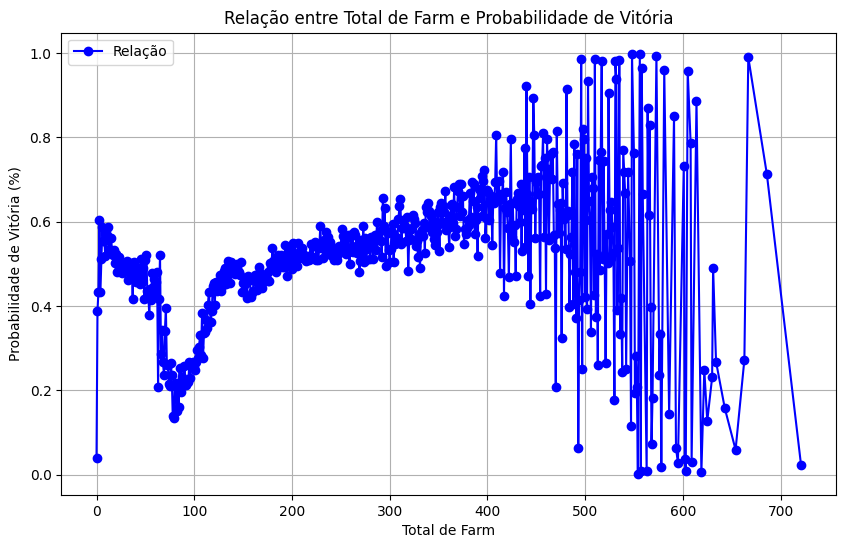

In [63]:
plt.figure(figsize=(10, 6))
plt.plot(farm_total['totalFarm'], farm_total['Probabilidade de Vitória'], marker='o', linestyle='-', color='b', label='Relação')
plt.xlabel('Total de Farm')
plt.ylabel('Probabilidade de Vitória (%)')
plt.title('Relação entre Total de Farm e Probabilidade de Vitória')
plt.grid(True)
plt.legend()
plt.show()

#### Analisando a relação entre quantidade de participações e probabilidade de vitória

In [13]:
participations = df.groupby('participations', as_index=False).mean(numeric_only=True).sort_values(by='participations', ascending=True)

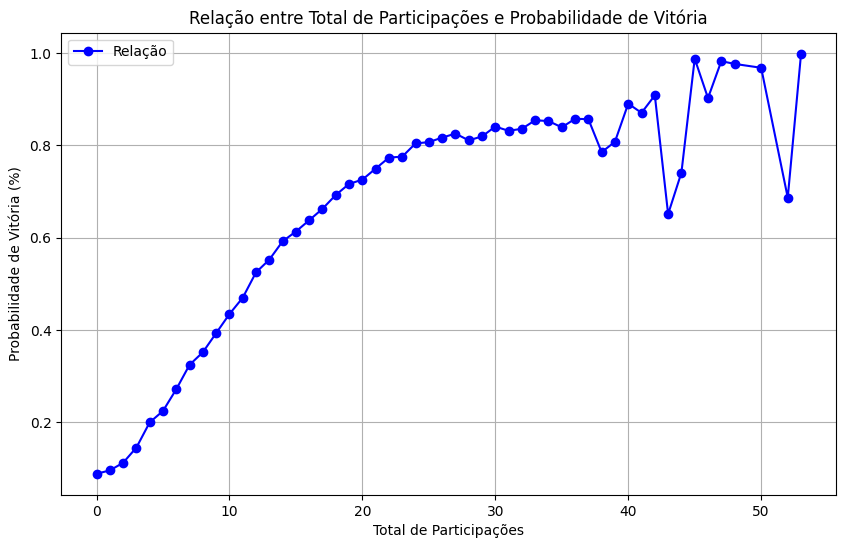

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(participations['participations'], participations['Probabilidade de Vitória'], marker='o', linestyle='-', color='b', label='Relação')
plt.xlabel('Total de Participações')
plt.ylabel('Probabilidade de Vitória (%)')
plt.title('Relação entre Total de Participações e Probabilidade de Vitória')
plt.grid(True)
plt.legend()
plt.show()

#### Analisando a relação entre quantidade de mortes e probabilidade de vitória

In [15]:
deaths = df.groupby('deaths', as_index=False).mean(numeric_only=True).sort_values(by='deaths', ascending=False)

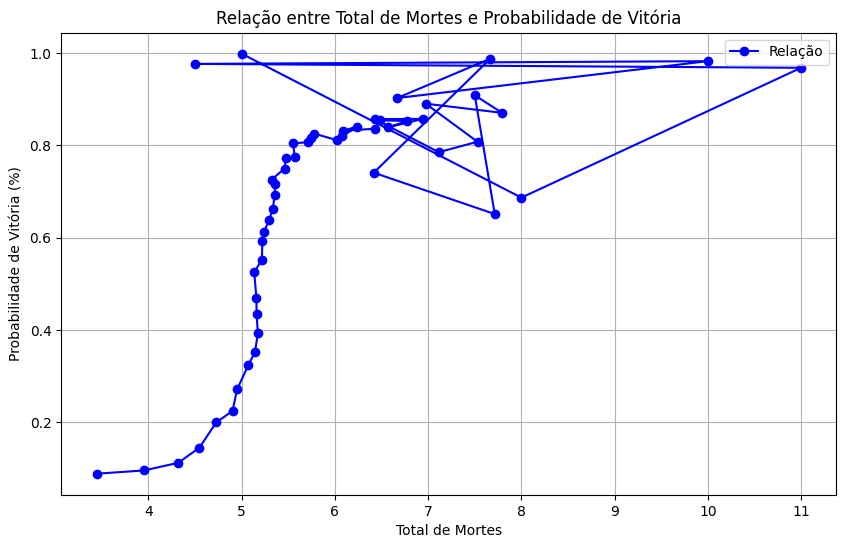

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(participations['deaths'], participations['Probabilidade de Vitória'], marker='o', linestyle='-', color='b', label='Relação')
plt.xlabel('Total de Mortes')
plt.ylabel('Probabilidade de Vitória (%)')
plt.title('Relação entre Total de Mortes e Probabilidade de Vitória')
plt.grid(True)
plt.legend()
plt.show()

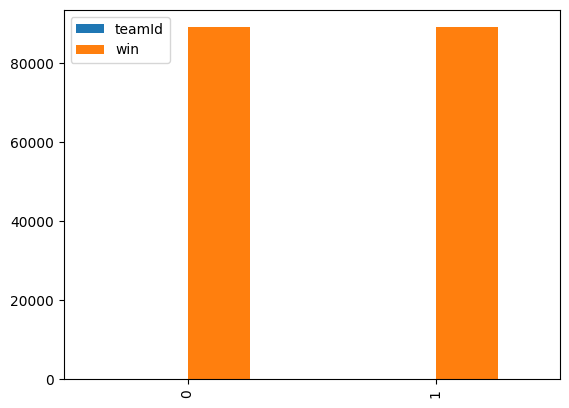

In [28]:
lado_winrate = df.groupby('teamId', as_index=False).count()[['teamId', 'win']].plot.bar()

In [24]:
lado_winrate

,teamId,win
0,100,88983
1,200,88985


#### Analisando a relação entre dano total causado e probabilidade de vitória

In [38]:
# Obtendo os limites dos quartis
quartis_bins = pd.qcut(df['totalDamageDealtToChampions'], 10, retbins=True)[1]

In [42]:
# Criando labels descritivos para cada quartil
labels = [f'{int(quartis_bins[i])} - {int(quartis_bins[i+1])}' for i in range(len(quartis_bins)-1)]

In [41]:
df['totalDamageDealtToChampionsQuartile'] = pd.qcut(df['totalDamageDealtToChampions'], 10, labels=labels)

In [47]:
dano_total = df.groupby('totalDamageDealtToChampionsQuartile', as_index=False).mean(numeric_only=True).sort_values(by='totalDamageDealtToChampions', ascending=True)

C:\Users\shady\AppData\Local\Temp\ipykernel_8336\1784328482.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dano_total = df.groupby('totalDamageDealtToChampionsQuartile', as_index=False).mean(numeric_only=True).sort_values(by='totalDamageDealtToChampions', ascending=True)


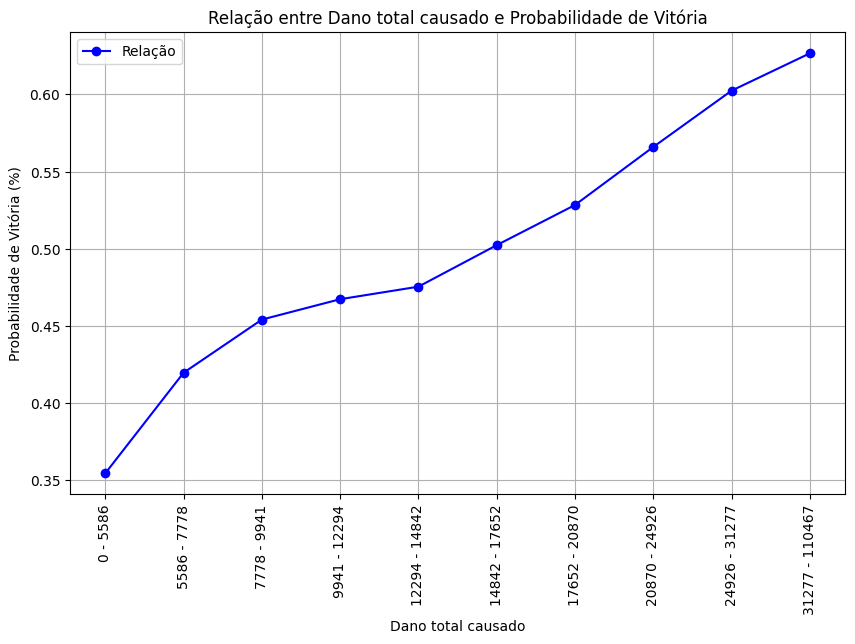

In [50]:
plt.figure(figsize=(10, 6))
plt.plot(dano_total['totalDamageDealtToChampionsQuartile'], dano_total['Probabilidade de Vitória'], marker='o', linestyle='-', color='b', label='Relação')
plt.xlabel('Dano total causado')
plt.ylabel('Probabilidade de Vitória (%)')
plt.title('Relação entre Dano total causado e Probabilidade de Vitória')
plt.grid(True)
plt.xticks(rotation=90)
plt.legend()
plt.show()

#### Analisando a relação entre controle de grupo causado e probabilidade de vitória

In [58]:
# Obtendo os limites dos quartis
quartis_bins = pd.qcut(df['timeCCingOthers'], 10, retbins=True)[1]

In [59]:
# Criando labels descritivos para cada quartil
labels = [f'{int(quartis_bins[i])} - {int(quartis_bins[i+1])}' for i in range(len(quartis_bins)-1)]

In [60]:
# Adicionando a coluna de quartis com labels ao DataFrame
df['timeCCingOthersQuartile'] = pd.qcut(df['timeCCingOthers'], 10, labels=labels)

In [61]:
timeCCingOthers = df.groupby('timeCCingOthersQuartile', as_index=False).mean(numeric_only=True).sort_values(by='timeCCingOthers', ascending=True)

C:\Users\shady\AppData\Local\Temp\ipykernel_8336\1936899147.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  timeCCingOthers = df.groupby('timeCCingOthersQuartile', as_index=False).mean(numeric_only=True).sort_values(by='timeCCingOthers', ascending=True)


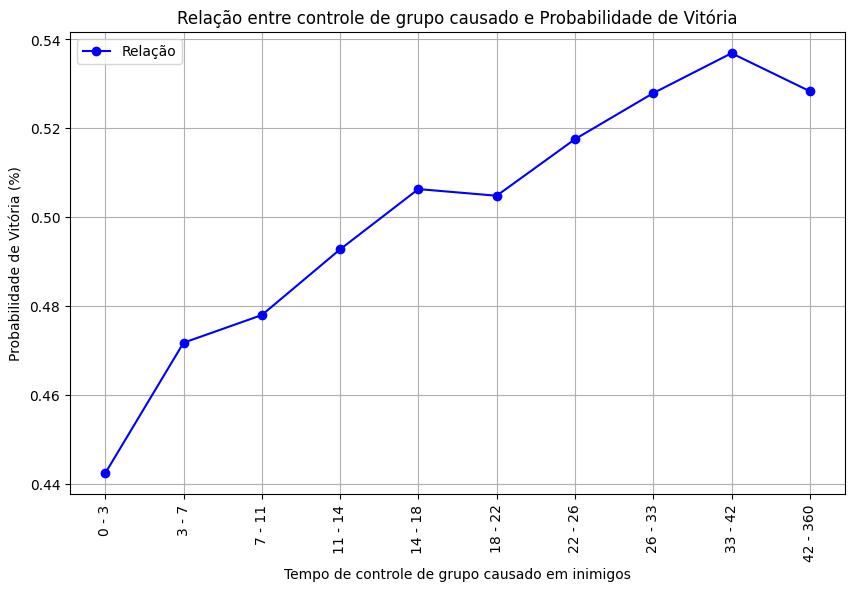

In [62]:
plt.figure(figsize=(10, 6))
plt.plot(timeCCingOthers['timeCCingOthersQuartile'], timeCCingOthers['Probabilidade de Vitória'], marker='o', linestyle='-', color='b', label='Relação')
plt.xlabel('Tempo de controle de grupo causado em inimigos')
plt.ylabel('Probabilidade de Vitória (%)')
plt.title('Relação entre controle de grupo causado e Probabilidade de Vitória')
plt.grid(True)
plt.xticks(rotation=90)
plt.legend()
plt.show()

## Conclusão final:


Nessa nossa curta análise exploratória, podemos perceber que a probabilidade de vitória é diretamente relacionada com: dano causado, controle de grupo causado, quantidade de participações e quantidade de farm...

Podemos resumir todas essas informações em quantidade de ouro gasto ao longo da partida: Em resumo, a probabilidade de vitória é proporcional à quantidade de ouro gasto. Quanto mais participações e farm você tem, mais ouro você ganha, quanto mais ouro você ganha, mais itens você compra e quanto mais itens você tiver, mais dano você vai dar. Será que é isso mesmo? Iremos tirar a prova real na análise abaixo jajá, mas vamos terminar nossa análise.

Também podemos perceber que campeões com controle de grupo tem uma alta probabilidade de vitória, e por último desmitificamos duas coisas:

- Morrer pouco não te faz um jogador melhor, muito pelo contrário. Jogadores com poucas mortes geralmente jogam com medo, e se você joga com medo, logo você também não irá dar dano nos adversários. Lembra que quanto mais dano você der, maior sua chance de ganhar a partida?
- O lado do mapa que você joga não importa. A quantidade de vitórias entre os dois lados é praticamente igual, a diferença é quase que inexistente. Pode ser que à nível individual, jogador X tenha mais facilidade em jogar em um lado do mapa do que em outro. Mas à nível global, pouco importa.

Vamos tirar nossa prova real?

#### Analisando a relação entre quantidade de ouro gasto e probabilidade de vitória:

In [66]:
# Obtendo os limites dos quartis
quartis_bins = pd.qcut(df['goldSpent'], 10, retbins=True)[1]

In [67]:
# Criando labels descritivos para cada quartil
labels = [f'{int(quartis_bins[i])} - {int(quartis_bins[i+1])}' for i in range(len(quartis_bins)-1)]

In [68]:
df['goldSpentQuartile'] = pd.qcut(df['goldSpent'], 10, labels=labels)

In [71]:
goldSpentQuartile = df.groupby('goldSpentQuartile', as_index=False).mean(numeric_only=True).sort_values(by='goldSpent', ascending=True)

C:\Users\shady\AppData\Local\Temp\ipykernel_8336\1359730454.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  goldSpentQuartile = df.groupby('goldSpentQuartile', as_index=False).mean(numeric_only=True).sort_values(by='goldSpent', ascending=True)


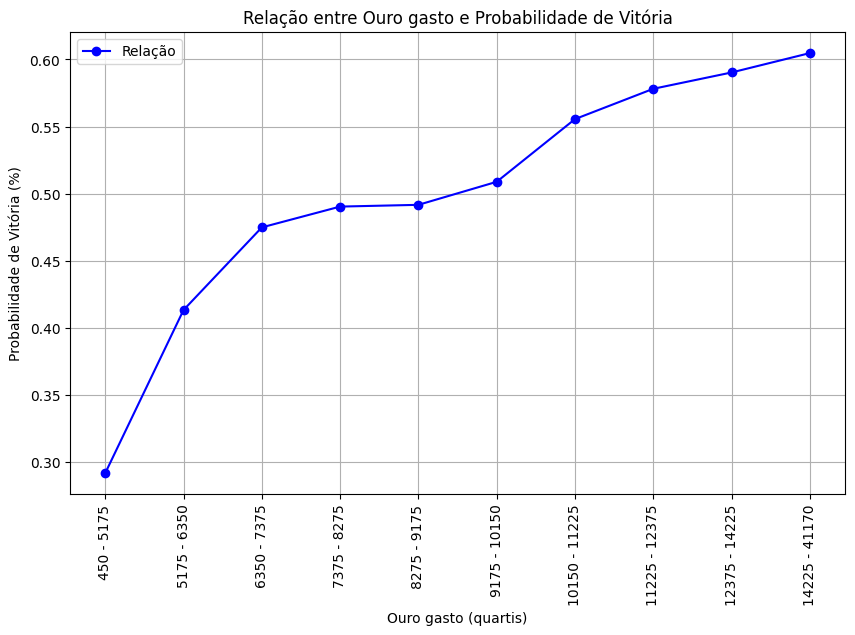

In [72]:
plt.figure(figsize=(10, 6))
plt.plot(goldSpentQuartile['goldSpentQuartile'], goldSpentQuartile['Probabilidade de Vitória'], marker='o', linestyle='-', color='b', label='Relação')
plt.xlabel('Ouro gasto (quartis)')
plt.ylabel('Probabilidade de Vitória (%)')
plt.title('Relação entre Ouro gasto e Probabilidade de Vitória')
plt.grid(True)
plt.legend()
plt.xticks(rotation=90)
plt.show()

#### E para finalizar, dizer muito obrigado à EBAC pelo excelente curso, e dizer à Semantix que eu ficaria extremamente honrado em trabalhar pra empresa 😊😊😊😊

Linkedin: https://www.linkedin.com/in/shadyrajaab/
Github: https://github.com/shadyrajab
E-mail: shadyrajaab@gmail.com
Telefone: 61 99820-7214